# Explore here

In [15]:
import os
import pandas as pd
import seaborn as sns
from dotenv import load_dotenv
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import matplotlib.pyplot as plt

# 3. Variables de entorno
# load the .env file variables
load_dotenv()
client_id = os.environ.get('CLIENT_ID')
client_secret = os.environ.get('CLIENT_SECRET')


In [11]:
# 4. Inicializar la biblioteca Spotipy
sp = spotipy.Spotify(auth_manager = SpotifyClientCredentials(client_id = client_id,client_secret = client_secret))

In [12]:
# 5. Realizar solicitudes a la API
# id artista: 2uFUBdaVGtyMqckSeCl0Qj
artist_id = "2uFUBdaVGtyMqckSeCl0Qj"

response = sp.artist_top_tracks(artist_id)
if response:
  tracks = response["tracks"]
  # Seleccionar de cada canción el nombre, la popularidad y la duración
  tracks = [{k: (v/(1000*60))%60 if k == "duration_ms" else v for k, v in track.items() if k in ["name", "popularity", "duration_ms"]} for track in tracks]

In [13]:
# 6. Transformar a DataFrame
tracks_df = pd.DataFrame.from_records(tracks)
tracks_df.sort_values(["popularity"], inplace = True)

print(tracks_df.head(3))

   duration_ms      name  popularity
9     5.400250   Le Onde          57
7     4.648883       Fly          58
4     3.319433  The Tree          60


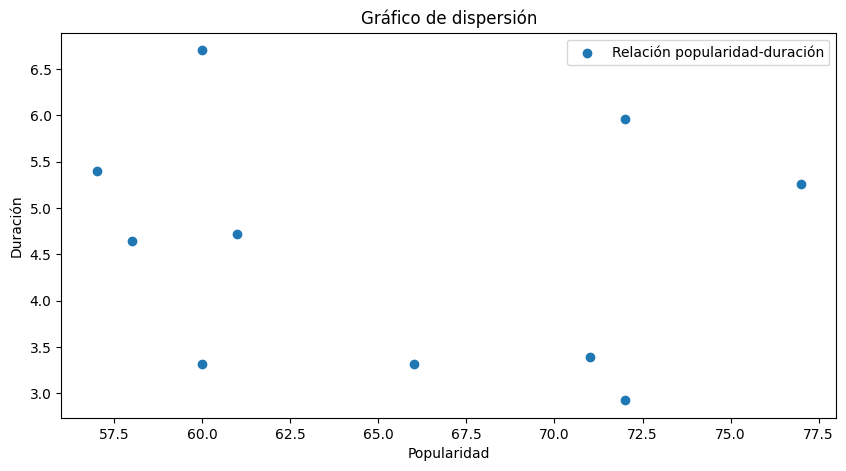

Conclusión: según la gráfica, la duración no tiene que ver con la popularidad, ya que los puntos están repartidos sin seguir un patrón

Si las canciones fuesen mas populares por durar menos, la mayoría de los puntos estarían en la esquina inferior derecha

Si las canciones fuesen mas populares por durar mas, la mayoría de los puntos estarían en la esquina superior derecha


In [19]:
# 7. Analizar si la duración está relacionada con la popularidad
plt.figure(figsize = (10, 5))

x = tracks_df["popularity"]
y = tracks_df["duration_ms"]
plt.scatter(x, y, label = "Relación popularidad-duración")
plt.xlabel('Popularidad')
plt.ylabel('Duración')
plt.title("Gráfico de dispersión")
plt.legend()
plt.show()

print("Conclusión: según la gráfica, la duración no tiene que ver con la popularidad, ya que los puntos están repartidos sin seguir un patrón.")
print("\nSi las canciones fuesen mas populares por durar menos, la mayoría de los puntos estarían en la esquina inferior derecha.")
print("\nSi las canciones fuesen mas populares por durar mas, la mayoría de los puntos estarían en la esquina superior derecha.")